In [2]:
import cv2
import os
from classes import WBsRGB as wb_srgb
from matplotlib import pyplot as plt

In [3]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
  (h, w) = image.shape[:2]

  if width is None and height is None:
    return image
  if width is None:
    r = height / float(h)
    dim = (int(w * r), height)
  else:
    r = width / float(w)
    dim = (width, int(h * r))

  return cv2.resize(image, dim, interpolation=inter)

In [12]:
# input and options
in_img = '../example_images/figure3.jpg'  # input image filename
img = cv2.imread(in_img)

In [14]:
def white_balancing(img, imshow=1, imwrite=0):
    out_dir = '.'  # output directory
    # use upgraded_model= 1 to load our new model that is upgraded with new
    # training examples.
    upgraded_model = 0
    # use gamut_mapping = 1 for scaling, 2 for clipping (our paper's results
    # reported using clipping). If the image is over-saturated, scaling is
    # recommended.
    gamut_mapping = 2
    imshow = 1  # show input/output image

    # processing
    # create an instance of the WB model
    wbModel = wb_srgb.WBsRGB(gamut_mapping=gamut_mapping,
                             upgraded=upgraded_model)
    os.makedirs(out_dir, exist_ok=True)
    # I = cv2.imread(in_img)  # read the image
    outImg = wbModel.correctImage(img)  # white balance it
    if imwrite == 1:
        cv2.imwrite(out_dir + '/' + 'result.jpg', outImg * 255)  # save it

    if imshow == 1:
        plt.imshow(ResizeWithAspectRatio(img, width=600))
        plt.show()
        plt.imshow(ResizeWithAspectRatio(outImg, width=600))
        plt.show()
    
    return outImg

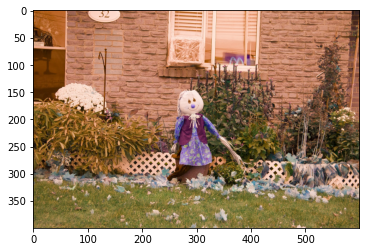

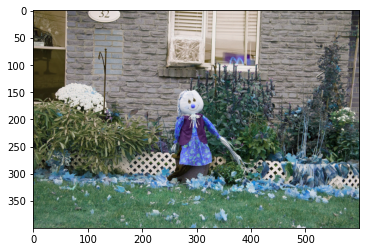

array([[[0.456502  , 0.3928083 , 0.26138073],
        [0.4455001 , 0.38006896, 0.24775952],
        [0.4814464 , 0.4221836 , 0.28554177],
        ...,
        [0.22937943, 0.25374508, 0.2568812 ],
        [0.19820994, 0.21329498, 0.21369871],
        [0.2088449 , 0.22947282, 0.2341116 ]],

       [[0.46515226, 0.40482694, 0.26051307],
        [0.45032275, 0.38778773, 0.24244583],
        [0.45401   , 0.39204907, 0.24698077],
        ...,
        [0.18058425, 0.18903364, 0.19063298],
        [0.16161442, 0.16048428, 0.15459745],
        [0.16980281, 0.17274617, 0.17005351]],

       [[0.46267334, 0.38761622, 0.22377197],
        [0.46267334, 0.38761622, 0.22377197],
        [0.44531605, 0.37438136, 0.2104463 ],
        ...,
        [0.14890553, 0.14463635, 0.15304425],
        [0.14072177, 0.13237047, 0.13749279],
        [0.14129378, 0.14052343, 0.14749274]],

       ...,

       [[0.3265635 , 0.45428562, 0.35757518],
        [0.30567107, 0.42578694, 0.3245936 ],
        [0.41072983, 0

In [17]:
white_balancing(img)